In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [13]:
df = pd.read_csv('cleaned_merged_heart_dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,60,1,0,140,207,0,0,138,1,1.9,2,1,3,0
1884,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
1885,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
1886,54,1,1,154,232,0,0,164,0,0.0,2,1,2,0


In [14]:
df.shape

(1888, 14)

<Axes: xlabel='target', ylabel='age'>

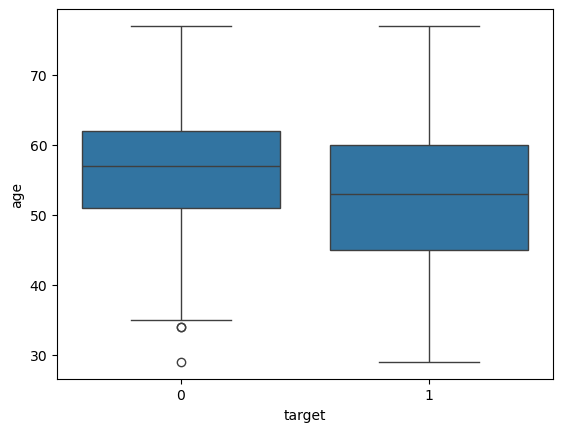

In [18]:
sns.boxplot(x=df['target'], y=df['age'], data=df)

<Axes: xlabel='target', ylabel='trestbps'>

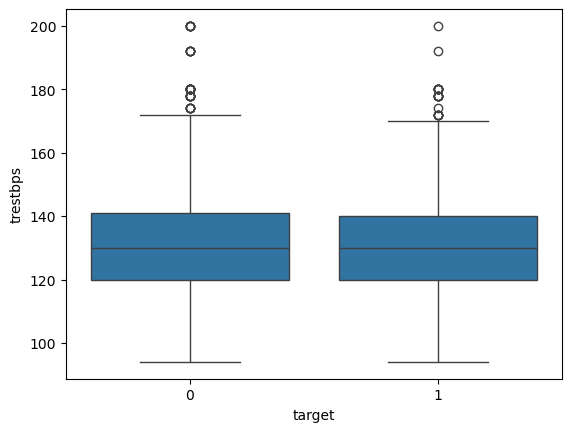

In [19]:
sns.boxplot(x=df['target'], y=df['trestbps'], data=df)

<Axes: xlabel='sex', ylabel='count'>

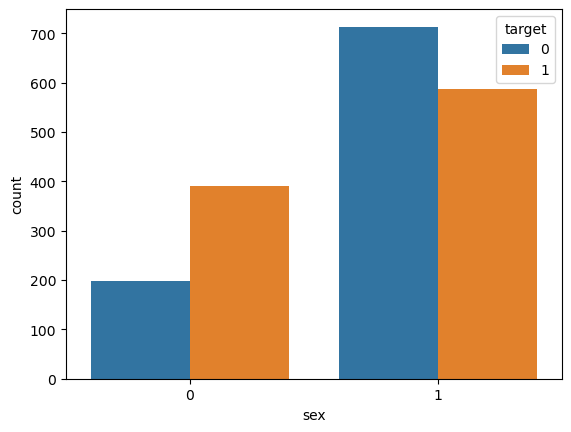

In [34]:
sns.countplot(x='sex', hue='target', data=df)

<Axes: xlabel='cp', ylabel='count'>

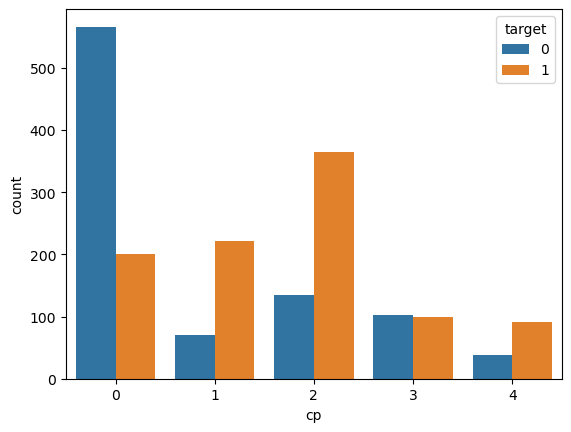

In [35]:
sns.countplot(x='cp', hue='target', data=df)

<Axes: xlabel='fbs', ylabel='count'>

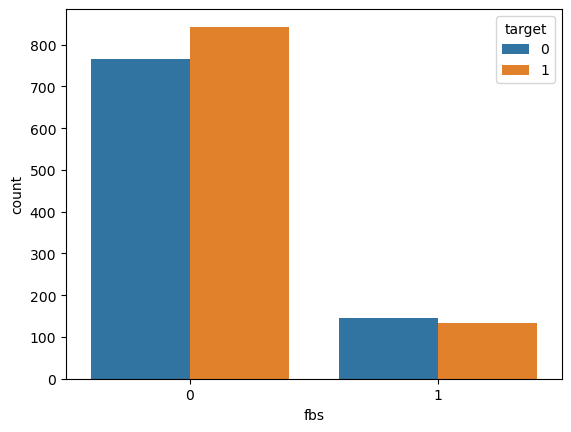

In [36]:
sns.countplot(x='fbs', hue='target', data=df)

From the following graph it is clear that when slope column is 2 then the target column is likely 1 and when the slope column is 1 then the target column is likey 0

<Axes: xlabel='slope', ylabel='count'>

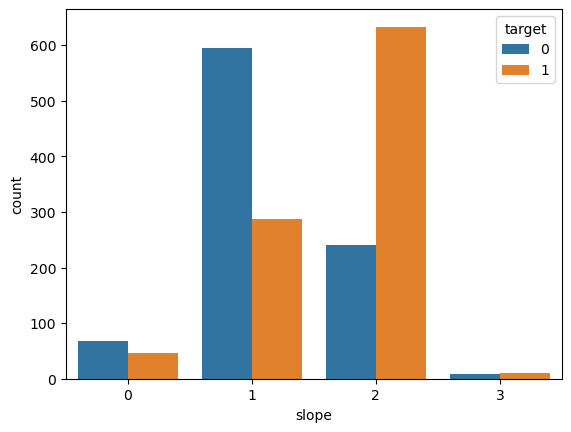

In [37]:
sns.countplot(x='slope', hue='target', data=df)

From the following graph it is clear that when thal column is 2 then the target column is likely 1 and when the slope column is 3 then the thal column is likey 0

<Axes: xlabel='thal', ylabel='count'>

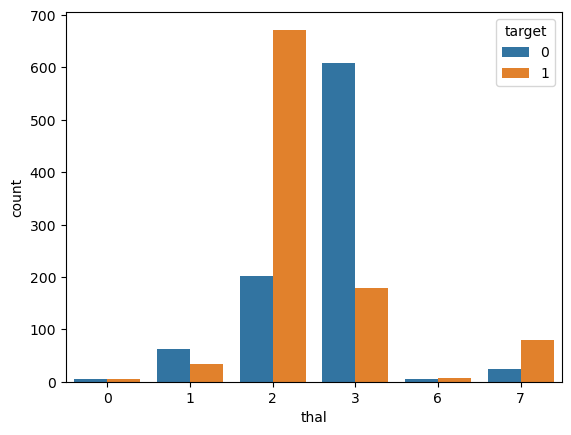

In [38]:
sns.countplot(x='thal', hue='target', data=df)

From the following graph it is clear that when ca column is 0 then the target column is likely 1

<Axes: xlabel='ca', ylabel='count'>

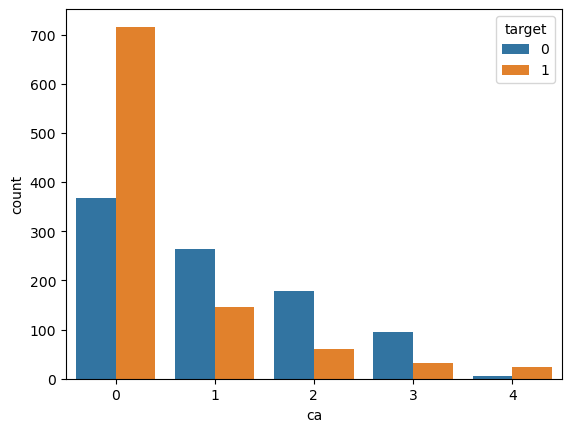

In [39]:
sns.countplot(x='ca', hue='target', data=df)

### Removing outliers

In [46]:
df.shape

(1888, 14)

In [47]:
columns_to_remove_from = ['age', 'trestbps', 'chol', 'thalachh', 'oldpeak']
for column in columns_to_remove_from:
    Q1 = np.quantile(df[column], 0.25)
    Q3 = np.quantile(df[column], 0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - IQR * 1.5
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [48]:
df.shape

(1769, 14)

### Scaling data

In [49]:
columns_to_scale = ['age', 'trestbps', 'chol', 'thalachh', 'oldpeak']
for column in columns_to_scale:
    scl = StandardScaler()
    df[column] = scl.fit_transform(df[[column]])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,0.985622,1,3,0.993431,-0.218577,1,0,0.005821,0,1.304639,0,0,1,1
1,-1.854060,1,2,0.014062,0.161556,0,1,1.633955,0,2.474482,0,0,2,1
2,-1.417186,0,1,0.014062,-0.867040,0,0,0.973901,0,0.427256,2,0,2,1
3,0.221092,1,1,-0.638850,-0.151495,0,1,1.237922,0,-0.157665,2,0,2,1
4,0.330310,0,0,-0.638850,2.487079,0,1,0.577868,1,-0.352639,2,0,2,1


### Splitting the data

In [58]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

### Building the model

Accuracy: 0.96045197740113
F1 Score: 0.9631578947368421


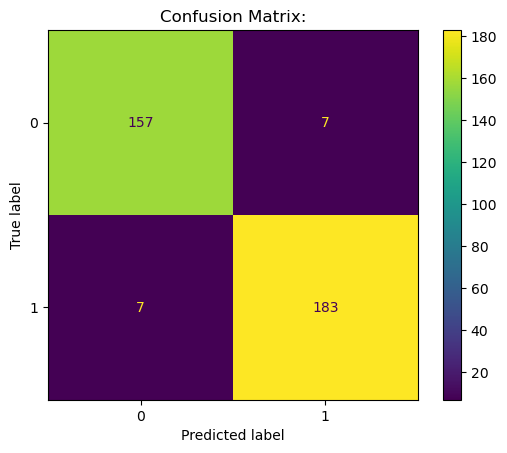

In [71]:
clf = KNeighborsClassifier()
param = {'n_neighbors': [1,3,5,7,9,11,13,15],
        'weights': ['uniform','distance']}
gsclf = GridSearchCV(clf,param)
gsclf.fit(X_train, y_train)
model = gsclf.best_estimator_
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
f1_model_score = f1_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1_model_score}')
cm = confusion_matrix(y_test, predictions)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.title(f'Confusion Matrix:')
plt.show()

In [77]:
model

KNeighborsClassifier(n_neighbors=9, weights='distance')

### Dataset documentation

age: The age of the patient (in years).
###### ----------------------------------
sex: The gender of the patient: 0 = female, 1 = male.
###### ----------------------------------
cp: Chest pain type (4 values)
0 = typical angina
1 = atypical angina
2 = non-anginal pain
3 = asymptomatic.
###### ----------------------------------
trestbps: Resting blood pressure.
###### ----------------------------------
chol: Serum cholesterol level.
###### ----------------------------------
fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
###### ----------------------------------
restecg	Resting electrocardiographic results:
0 = normal
1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
2 = showing probable or definite left ventricular hypertrophy by Estes' criteria.
###### ----------------------------------
thalachh: Maximum heart rate achieved during exercise.
###### ----------------------------------
exang: Exercise-induced angina (1 = yes; 0 = no).
###### ----------------------------------
oldpeak: ST depression induced by exercise relative to rest (a measure of heart stress).
###### ----------------------------------
slope: The slope of the peak exercise ST segment
0 = upsloping
1 = flat
2 = downsloping.
###### ----------------------------------
ca: Number of major vessels (0-3) colored by fluoroscopy.
###### ----------------------------------
thal: Thalassemia type
1 = normal
2 = fixed defect (no blood flow in some part of the heart)
3 = reversible defect (blood flow is observed but compromised).
###### ----------------------------------
target: Diagnosis of heart disease
0 = no heart disease
1 = heart disease present.

### EDA documentation

Plotted box plot between age and trestbps with target column and found outliers
Plotted count plots between all categorical columns and the target column, the following patterns were found:
When slope column is 2 then the target column is likely 1 and when the slope column is 1 then the target column is likey 0
When thal column is 2 then the target column is likely 1 and when the slope column is 3 then the thal column is likey 0
When ca column is 0 then the target column is likely 1

### Preprocessing documentation

Removed outliers from all numeric (continous) columns
Scaled all numeric columns using standard scaler as columns have different ranges to improve models

### Building the model

Splitted the data into training and testin data with test size of 0.2
Selected KNN classifier (It is well-suited for this problem since heart disease patterns are often associated with clusters of similar clinical profiles) and used grid search to search for the best combination of parameters that would give the best accuracy score
###### Paramters list: 
n_neighbors(Number of neighboring points to consider) : 1,3,5,7,9,11,13,15
weights: uniform (all points are treated equally), distance (closer points have more influence)


###### Best parameters found were:
n_neighbors = 9, weights = distance

### Model results

###### Accuracy and f1 score:
The accuracy of the model and f1 score were approximately 96%
###### Confusion matrix:
The model correctly predicted 340 out of 354 as displayed in the confusion matrix

### Insights

The model can serve as a decision-support tool for doctors by flagging high-risk patients based on readily available clinical measurements.